In [1]:
# This script is designed to model the net mass loss of a meteor over time.
# The major outputs consist of a light curve and an energy deposition curve.
# The goal is to create a model that simulates the freefall behaviour of any meteoroid type, including irons.

import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import random
import numpy as np
import ipywidgets as widgets
import os, glob

In [2]:
# Define constants
pi = 3.14159265358979
e = 2.718281828459045
H0 = 7160. # critical height of exponental atmosphere, m
D0 = 1.290 # critical density of exponential atmosphere, kg/m3
R = 6371000 # average radius of the Earth, m

In [3]:
# Essential inputs; current values from Almahata Sitta 2008 airburst
H = 100000. # height at beginning of fireball phase, m
M = 40000. # entry mass, kg
V = 12400. # entry speed, m/s
Dm = 3050. # meteoroid density, kg/m3
Ca = 5.0E-8 # ablation coefficient, s2/m2 or kg/J
Cd = 1. # drag coefficient
Cf = 0.2 # fragmentation coefficient
slope = 19.0 # entry angle, degrees above horizontal

In [4]:
# Additional setup
t = 0
dt = 0.01 # time interval between iterations, s

gamma = (slope*2*pi)/360 # entry angle, radians above horizontal
Z = (pi/2)-gamma # zenith angle, radians from vertical

S = pi*((3*M)/(4*pi*Dm))**(2/3) # sectional area of meteoroid assuming SPHERICAL shape, m2
# S = (M/Dm)**(2/3) # sectional area of meteoroid assuming CUBIC shape, m2

# tau = 0.17 # luminous efficiency, %
Y = 44400 # meteoroid yield strength, Pa
f = 1.6 # fragment scaling factor

df = pd.DataFrame(columns=['Time', 'Height', 'Speed', 'Slope', 'Mass', 'Weight', 'Sectional area', 'Dynamic pressure', 'Intensity', 'Radiated energy'])
dict_list=[]

In [5]:
# Iterate over time
for i in range(20000):
    t = t + dt # time, s
    Pa = 111135*e**(-0.000146*H) #atmospheric pressure, Pa
    Da = 1.5022*e**(-0.000144*H) #atmospheric density, kg/m3
    g = 9.80665*((R/(R+H))**2) # gravitational field strength, m/s2
    
    Pd = Da*V*V # dynamic pressure, Pa
    a = (g*math.cos(Z))-(Cd*Pd*S/M)
    Vf = V + a*dt
    # Hf = H - dt*((((Vf*Vf)-(V*V))/(2*a))*math.sin(gamma))
    Hf = H - dt*V*math.sin(gamma)
    Mf = M - dt*0.5*Da*Vf*Vf*Vf*S*Ca

    # luminous efficiency values from Halliday et al (1996):
    if Vf<=10000:
        tau = 0
    elif Vf>=36000:
        tau = 0.069*(36000/Vf)**2
    else:
        tau = 0.04
    
    E = 0.5*M*V*V
    Ef = 0.5*Mf*Vf*Vf
    dE = abs(Ef-E) # change in kinetic energy, J
    I = tau*(dE/dt) # luminous intensity, arbitrary units

    Sf = pi*((3*Mf)/(4*pi*Dm))**(2/3.) # new sectional area of meteoroid assuming SPHERICAL shape, m2
    # Sf = (Mf/Dm)**(2/3.) # new sectional area of meteoroid assuming CUBIC shape, m2

    H = Hf
    V = Vf
    M = Mf
    S = Sf
    W = M*g # weight force, N
    
    # gamma = gamma + ((V/(R+H))-(g/V))*math.cos(gamma) # update trajectory slope for next iteration
    # Z = (pi/2)-gamma
    # slope = (gamma*360)/(2*pi)
    
    if M<=0:
        break
    elif V<=3000:
        break
    elif H<=0:
        break
    else:
        # Update the table
        row=[t, H, V, slope, M, W, S, Pd, I, dE]
        df.loc[len(df)] = row

df = df.reset_index(drop=True)
print(df.head())
print(df.tail())

   Time        Height         Speed  Slope          Mass         Weight  \
0  0.01  99959.629549  12400.030732   19.0  39999.997317  380235.838608   
1  0.02  99919.258998  12400.061463   19.0  39999.994617  380240.557328   
2  0.03  99878.888346  12400.092193   19.0  39999.991903  380245.275999   
3  0.04  99838.517595  12400.122922   19.0  39999.989172  380249.994619   
4  0.05  99798.146744  12400.153650   19.0  39999.986425  380254.713187   

   Sectional area  Dynamic pressure     Intensity  Radiated energy  
0        6.723533        128.745064  6.014668e+07     1.503667e+07  
1        6.723533        129.496325  6.014027e+07     1.503507e+07  
2        6.723533        130.251972  6.013381e+07     1.503345e+07  
3        6.723532        131.012030  6.012731e+07     1.503183e+07  
4        6.723532        131.776525  6.012077e+07     1.503019e+07  
       Time        Height        Speed  Slope         Mass        Weight  \
2473  24.74  12166.544997  3034.835420   19.0  6460.484175 

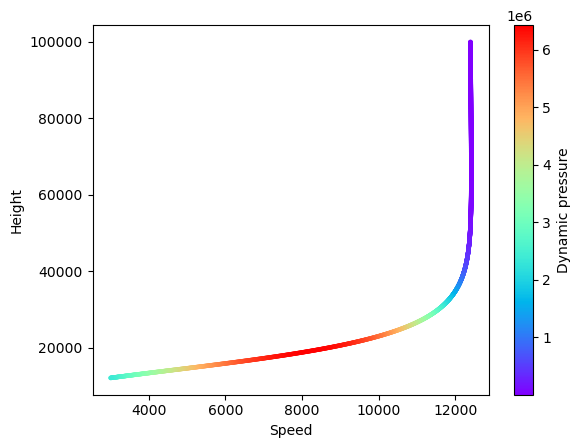

In [7]:
# Plot trajectory
df.plot.scatter(x="Speed", y="Height", s=5, c="Dynamic pressure", colormap='rainbow')
plt.show()

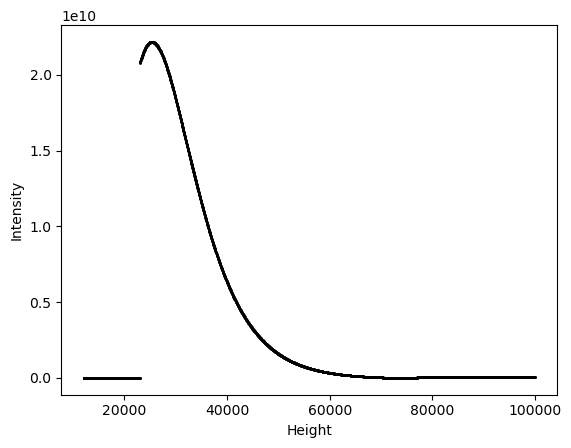

In [8]:
# Plot light curve
df.plot.scatter(x="Height", y="Intensity", s=1, c='black')
plt.show()

In [6]:
# Export the table
# change 'hic' to the file name you prefer
# df.to_csv('hic.csv', encoding='utf-8', index=False)

In [ ]:
# Created by T.W.C. Stevenson, June 2024
# References:
# Wheeler et al (2018) 'Atmospheric energy deposition modeling and inference for varied meteoroid structures'
# Pearl et al (2023) 'Insights into the failure mode of the Chelyabinsk meteor from high-fidelity simulation'

# Thanks for giving it a go!